In [1]:
#importing the dependencies
import csv
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st #pearson
from scipy.stats import linregress
from sklearn.linear_model import LinearRegression

In [2]:
# Load the dataset from the provided path
file_path = "house_price_prediction_dataset.csv"
origin_data = pd.read_csv(file_path)
origin_data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [3]:
# Showign the last 5 rows of data
origin_data.tail()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119
1999,2000,2989,5,1,3,1903,Suburban,Fair,No,482525


In [4]:
# Describing the shape of the data by indicating the number of rows and columns (rows , columns)
origin_data.shape

(2000, 10)

In [5]:
# Finding the datatype
origin_data.dtypes

Id            int64
Area          int64
Bedrooms      int64
Bathrooms     int64
Floors        int64
YearBuilt     int64
Location     object
Condition    object
Garage       object
Price         int64
dtype: object

In [6]:
# Finding the missing values
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [7]:
# finding the average price depending on the location (analysis),rounding upto two decimal
location_price = origin_data.groupby("Location")["Price"].mean().round(2)
print(location_price)

Location
Downtown    536059.66
Rural       538613.94
Suburban    557416.33
Urban       518963.55
Name: Price, dtype: float64


In [8]:
#Graph Location_Price

In [9]:
 # finding the average priceof the house by condition(excellent,good ,poor)
condition_price = origin_data.groupby("Condition")["Price"].mean().round(2)
print(condition_price)

Condition
Excellent    530812.01
Fair         560594.14
Good         529002.35
Poor         528933.22
Name: Price, dtype: float64


In [10]:
#Graph Condition_Price

In [11]:
#creation of variable to show the mean price based on the year built
yearbuilt_mean_price = origin_data.groupby('YearBuilt')['Price'].mean().round(2)
print(yearbuilt_mean_price)

YearBuilt
1900    532297.58
1901    554257.96
1902    487525.43
1903    364482.33
1904    695236.93
          ...    
2019    592602.44
2020    548988.50
2021    483393.75
2022    523632.00
2023    620942.92
Name: Price, Length: 124, dtype: float64


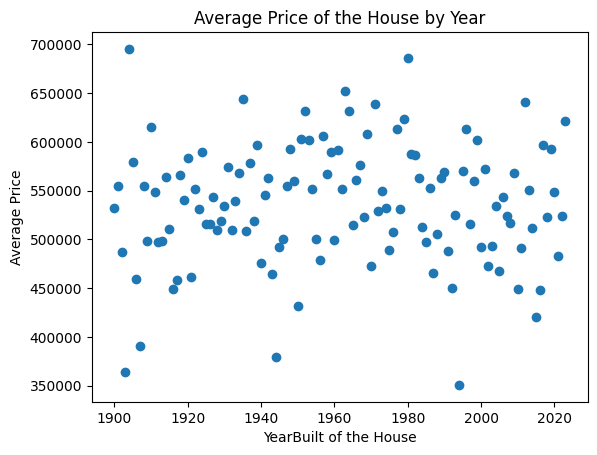

In [12]:
#Plotting the Average YearBuilt Price of the House
plt.scatter(yearbuilt_mean_price.index, yearbuilt_mean_price)
plt.xlabel('YearBuilt of the House')
plt.ylabel('Average Price')
plt.title('Average Price of the House by Year')
plt.show()

slope=54.16658527143971
y-intercept=429956.8038771678
The correlation between both factors is 0.03


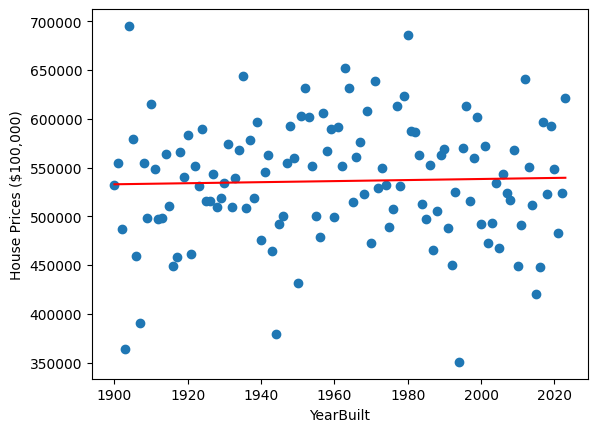

In [13]:
# Add the linear regression equation and line to plot
x_values = yearbuilt_mean_price.index
y_values = yearbuilt_mean_price
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel('YearBuilt')
plt.ylabel('House Prices ($100,000)')
print(f'slope={slope}\ny-intercept={intercept}')
correlation = st.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [14]:
#Predict the Average Price of the House in 1942
x=1980
y=slope*x+intercept
y

np.float64(537206.6427146185)

In [15]:
# New Variable created testing the floor area average
floors_avg_area = origin_data.groupby('Floors')['Price'].mean()
print(floors_avg_area)

Floors
1    520413.978820
2    534537.396527
3    558633.841049
Name: Price, dtype: float64


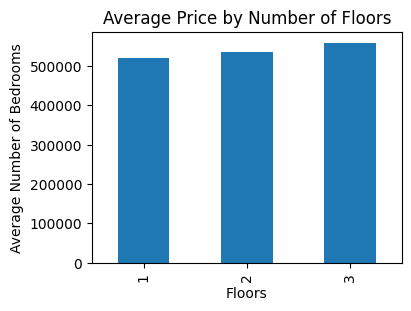

In [16]:
#Bar graph
# Bar plot of average number of bedrooms by location
bedrooms_by_location = origin_data.groupby('Floors')['Price'].mean()
bedrooms_by_location.plot(kind='bar', figsize=(4, 3))
plt.title('Average Price by Number of Floors')
plt.ylabel('Average Number of Bedrooms')
plt.show()

In [17]:
# New variable to determine price by number of bathrooms present in house
bathrooms_min_price = origin_data.groupby('Bathrooms')['Price'].min()
print(bathrooms_min_price)

Bathrooms
1    51082
2    50005
3    53657
4    51845
Name: Price, dtype: int64


In [18]:
# Location conditions relative to the average price
location_condition_avg_price = origin_data.groupby(['Location', 'Condition'])['Price'].mean()
print(location_condition_avg_price)

Location  Condition
Downtown  Excellent    524477.967320
          Fair         584624.766423
          Good         510704.191176
          Poor         525203.022727
Rural     Excellent    547966.141667
          Fair         579754.727273
          Good         500956.690000
          Poor         515768.680328
Suburban  Excellent    553103.377049
          Fair         562783.795276
          Good         570986.252252
          Poor         543906.186992
Urban     Excellent    497976.370690
          Fair         511798.304000
          Good         534554.131579
          Poor         530908.484615
Name: Price, dtype: float64


In [19]:
#Pie Chart

In [20]:
# the price of a hosue relative to the factor garage
garage_max_price = origin_data.groupby('Garage')['Price'].max()
print(garage_max_price)

Garage
No     999656
Yes    999453
Name: Price, dtype: int64


In [21]:
location_count = origin_data.groupby('Location')['Id'].count()
# creation of variable showing the percentage of total houses in each location
total_houses = location_count.sum()
location_percentage = (location_count / total_houses) * 100
print("Percentage of houses in each location:")
print(location_percentage)

Percentage of houses in each location:
Location
Downtown    27.90
Rural       23.70
Suburban    24.15
Urban       24.25
Name: Id, dtype: float64


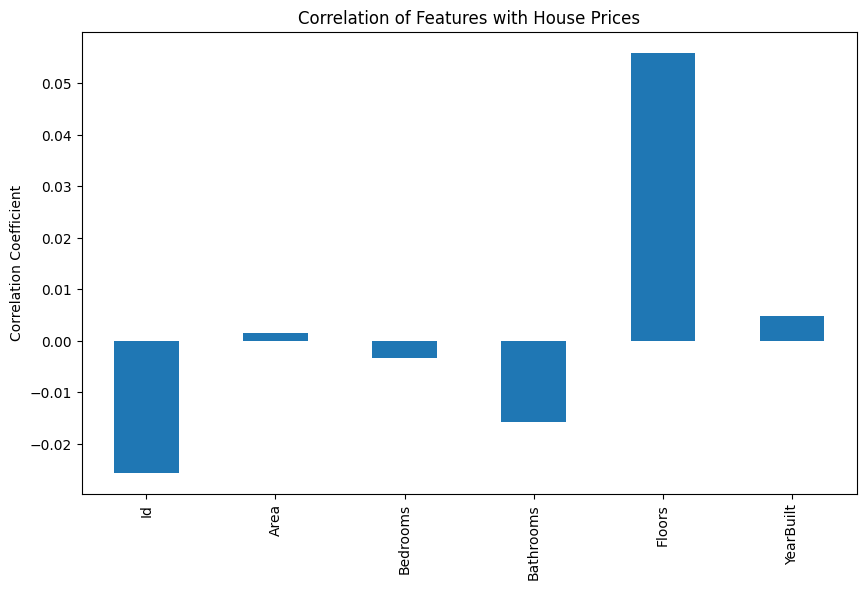

In [22]:
# Creating a correlation matrix to identify relationships within data
# Exclude non-numeric columns from dataframe
numeric_data = origin_data.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix only on numeric data
correlation = numeric_data.corr()

# Bar plot of correlation with Price
correlation['Price'].drop('Price').plot(kind='bar', figsize=(10, 6))
plt.title('Correlation of Features with House Prices')
plt.ylabel('Correlation Coefficient')
plt.show()

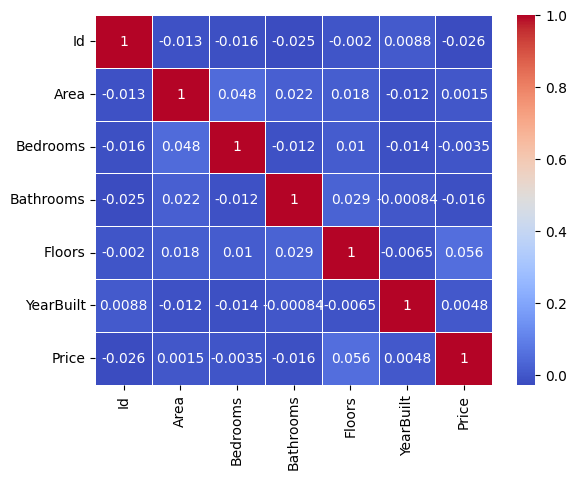

In [23]:
import seaborn as sns

sns.heatmap(correlation, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

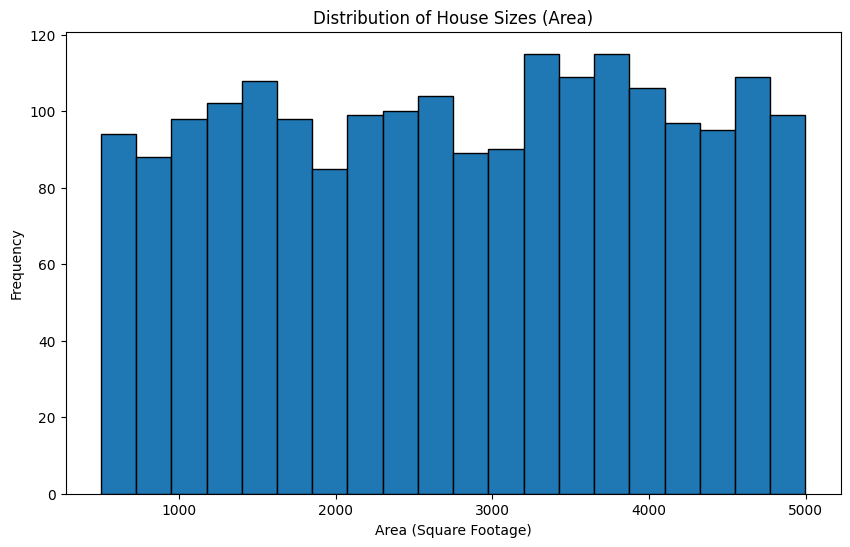

In [24]:
# Histogram of house sizes (Area)
origin_data['Area'].plot(kind='hist', bins=20, edgecolor='black', figsize=(10, 6))
plt.title('Distribution of House Sizes (Area)')
plt.xlabel('Area (Square Footage)')
plt.ylabel('Frequency')
plt.show()

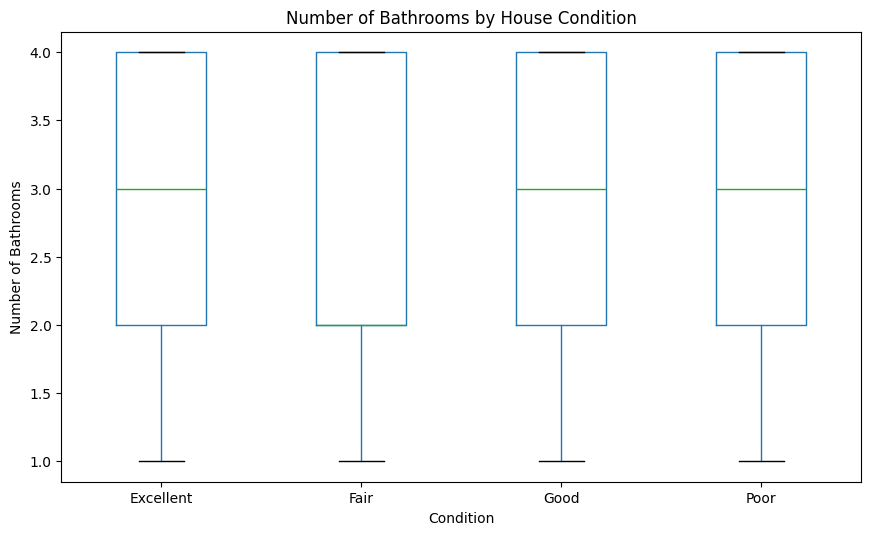

In [25]:
# Boxplot of number of bathrooms by house condition
origin_data.boxplot(column='Bathrooms', by='Condition', grid=False, figsize=(10, 6))
plt.title('Number of Bathrooms by House Condition')
plt.suptitle('')
plt.ylabel('Number of Bathrooms')
plt.show()

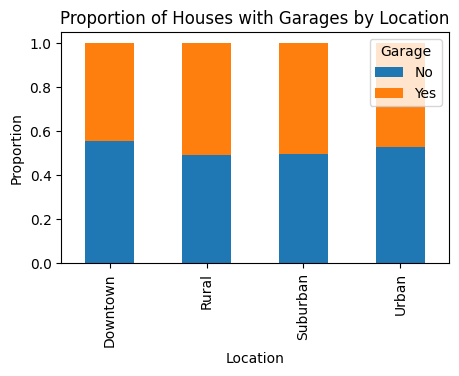

In [26]:
# Bar plot of garage presence by location
garage_by_location = origin_data.groupby('Location')['Garage'].value_counts(normalize=True).unstack()
garage_by_location.plot(kind='bar', stacked=True, figsize=(5, 3))
plt.title('Proportion of Houses with Garages by Location')
plt.ylabel('Proportion')
plt.show()

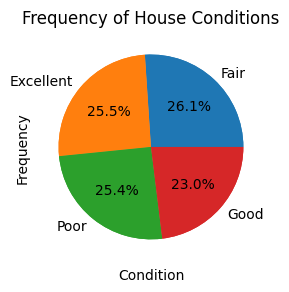

In [27]:
# Bar plot of house condition frequency
origin_data['Condition'].value_counts().plot(kind='pie', figsize=(6, 3))
plt.title('Frequency of House Conditions')
plt.pie(origin_data['Condition'].value_counts(), autopct='%1.1f%%')
plt.ylabel('Frequency')
plt.xlabel('Condition')
plt.show()

In [28]:
mdl = LinearRegression()

In [29]:
origin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [30]:
columns_to_copy = ['Area','Bedrooms','Bathrooms', 'Floors', 'Location', 'Price']
duplicated_data = origin_data[columns_to_copy].copy()
duplicated_data.head(10)

,Area,Bedrooms,Bathrooms,Floors,Location,Price
0,1360,5,4,3,Downtown,149919
1,4272,5,4,3,Downtown,424998
2,3592,2,2,3,Downtown,266746
3,966,4,2,2,Suburban,244020
4,4926,1,4,2,Downtown,636056
5,3944,1,2,1,Urban,93262
6,3671,1,1,2,Rural,448722
7,3419,2,4,1,Suburban,594893
8,630,2,2,1,Rural,652878
9,2185,3,3,1,Downtown,340375


In [31]:
duplicated_data.loc[duplicated_data['Location'] == 'Downtown', 'Location'] = 1
duplicated_data.loc[duplicated_data['Location'] == 'Suburban', 'Location'] = 2
duplicated_data.loc[duplicated_data['Location'] == 'Urban', 'Location'] = 3
duplicated_data.loc[duplicated_data['Location'] == 'Rural', 'Location'] = 4

# Display the DataFrame to confirm the changes
print(duplicated_data)

      Area  Bedrooms  Bathrooms  Floors Location   Price
0     1360         5          4       3        1  149919
1     4272         5          4       3        1  424998
2     3592         2          2       3        1  266746
3      966         4          2       2        2  244020
4     4926         1          4       2        1  636056
...    ...       ...        ...     ...      ...     ...
1995  4994         5          4       3        2  295620
1996  3046         5          2       1        2  580929
1997  1062         5          1       2        4  476925
1998  4062         3          1       2        3  161119
1999  2989         5          1       3        2  482525

[2000 rows x 6 columns]


In [32]:
X = duplicated_data.drop(['Price'], axis=1)
y = duplicated_data['Price']

In [33]:
X.head()

,Area,Bedrooms,Bathrooms,Floors,Location
0,1360,5,4,3,1
1,4272,5,4,3,1
2,3592,2,2,3,1
3,966,4,2,2,2
4,4926,1,4,2,1


In [34]:
y.head()

0    149919
1    424998
2    266746
3    244020
4    636056
Name: Price, dtype: int64

In [35]:
mdl.fit( X, y)

LinearRegression()

In [36]:
# Area, Bedrooms, Bathrooms, Floors, Location
mdl.predict([[4272, 7, 4, 3, 1]]).round(2)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([551877.36])

In [42]:
def get_user_input():
    area = float(input("Enter the area (in square feet): "))
    bedrooms = int(input("Enter the number of bedrooms: "))
    bathrooms = int(input("Enter the number of bathrooms: "))
    location = int(input("Enter the location (1: downtown, 2: suburban, 3: urban, 4: rural): "))
    floor = int(input("Enter the number of floors: "))

    
    user_data = pd.DataFrame({
        'Area': [area],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Floors': [floor],
        'Location': [location]  
    })

    return user_data


user_input = get_user_input()


prediction = mdl.predict(user_input)

print(f"The predicted price for the entered data is: ${prediction[0]:,.2f}")

Enter the area (in square feet):  3000
Enter the number of bedrooms:  3
Enter the number of bathrooms:  2
Enter the location (1: downtown, 2: suburban, 3: urban, 4: rural):  2
Enter the number of floors:  3


The predicted price for the entered data is: $560,867.51
